# Block 11

## Exercise 3 - FFT with $N=4$

In [4]:
f = [2 4 6 8]';
fft(f)

ans =

   20 +  0i
   -4 +  4i
   -4 +  0i
   -4 -  4i



## Exercise 4 - FFT of a sin-wave

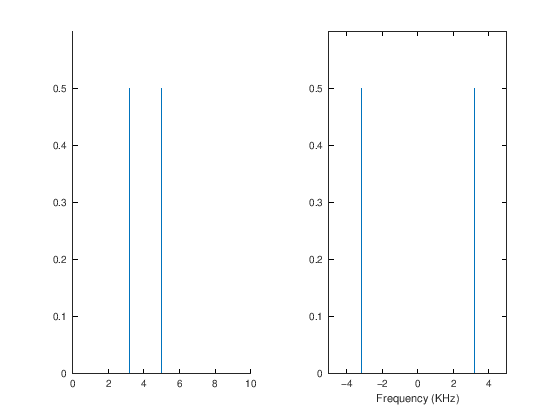

In [35]:
fsHz = 8192; % sampling frequency in Hz
dur = 1; % duration of sample (3 seconds)

% Use different frequencies 440Hz, 1 kHz, 3 kHz, 5 kHz
fHz = 5000; % frequency of sin-wave in Hz 
A = 1; % amplitude of sin-wave
dt = 1/fsHz; % sample periode
ts = 0:dt:dur-dt; % sample times
f = A*sin(2*pi*fHz*ts); % compute sound signal at sample times
audiowrite("sound.wav", f, fsHz)

% play sound
player = audioplayer (f, fsHz);
play (player);


N = fsHz * dur;
F = fft(f,N)/N;
absF = abs(F);
Faxis = linspace(-fsHz/2,fsHz/2,N);
figure(1)
clf
subplot(1,2,1)
plot(linspace(0,fsHz,N)/1000,absF);
box off;
axis([0 10 0 0.6])
subplot(1,2,2)
plot(Faxis/1000,fftshift(absF));
axis([-5 5 0 0.6])
xlabel('Frequency (KHz)')


## Exercise 5 - 2-D Fourier Transform

In [37]:
M = 256;
N = 256;
f = zeros(M, N);

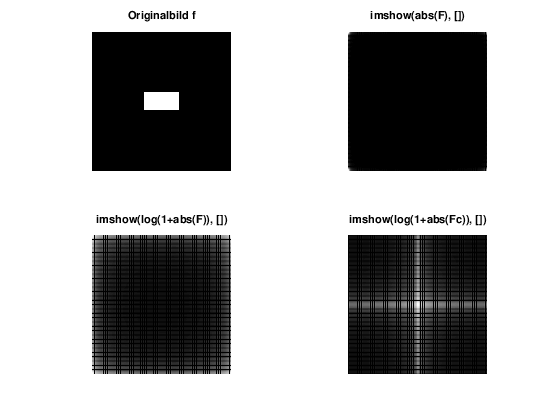

In [40]:
M1 = 32;
N1 = 64;
f(M/2-M1/2+1:M/2+M1/2, N/2-N1/2+1:N/2+N1/2) = 1;
figure(1);
subplot(2,2,1)
imshow(f);
title('Originalbild f')
F = fft2(f);
subplot(2,2,2)
imshow(abs(F), [])
title('imshow(abs(F), [])')
subplot(2,2,3)
imshow(log(1+abs(F)), [])
title('imshow(log(1+abs(F)), [])')
Fc = fftshift(F);
subplot(2,2,4)
imshow(log(1+abs(Fc)), [])
title('imshow(log(1+abs(Fc)), [])')

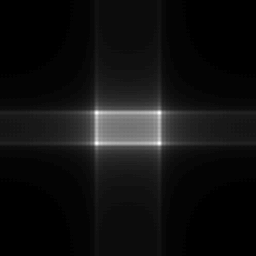

In [41]:
Fn = ifftshift(F);
Fnew = F;
Fnew(M/4:M,:)=0;
Fnew(:,M/4:M)=0;
fnew = ifft2(Fnew);
imshow(abs(fnew), [])

The rectangle has no longer sharp edges. Sharp edges can only be reconstructed using high frequencies which are now missing.

## Exercise 6 - The aperiodic convolution

https://octave.sourceforge.io/octave/function/conv.html

In [41]:
% Abtastwerte
f = [0 0.02 0.08 0.18 0.32 0.51 0.73 1];
g = [0 0.14 0.29 0.43 0.57 0.71 0.86 1];

% fft
F = fft([f zeros(1,length(g)-1)]);
G = fft([g zeros(1,length(f)-1)]);

% octave built in convolution function
conv(f,g)

% Piecewise multiplication of F and G and then inverse fft to get the convoluted frequency
ifft(F.*G)

ans =

 Columns 1 through 8:

   0.00000   0.00000   0.00280   0.01700   0.05700   0.14280   0.30140   0.56430

 Columns 9 through 15:

   0.97000   1.35660   1.66340   1.84690   1.84780   1.59000   1.00000

ans =

 Columns 1 through 8:

   0.00000   0.00000   0.00280   0.01700   0.05700   0.14280   0.30140   0.56430

 Columns 9 through 15:

   0.97000   1.35660   1.66340   1.84690   1.84780   1.59000   1.00000



## Exercise 7 - The circular convolution

In [34]:
% O(n^2)
function f = circularconv(x,y)

    % get lenght of input
    len = size(x,1);

    for n = 1:len
        sum = 0;
        for k = 1:len
            % get the new position using modulo 
            m = mod(n-k,len);
            % calculate the sum of every element
            sum += x(k)*y(m+1);
        end
        f(n) = sum;
    end
end

In [35]:
x = [1; 2; 4; 5; 6];
y = [7; 8; 9; 3; 0];

f = circularconv(x,y)

f =

   112    91    71    88   124



In [37]:
% Alternative
x = [1; 2; 4; 5; 6]';
y = [7; 8; 9; 3; 0]';

X = fft(x);
Y = fft(y);
f = ifft(X.*Y)

% in matlab would fur

f =

   112    91    71    88   124

